# Emulating CLASS data

## Import Packages

In [1]:
import os
import numpy as np
import random

import pandas as pd
import time
import matplotlib.pyplot as plt

from looti import dictlearn as dcl
from looti import datahandle as dhl
from looti import plotting as pm
from looti import tools as too

In [2]:
%matplotlib inline

In [3]:
df1 = pd.read_csv('../data/50mpk_z0to2_steps0p1.csv', index_col=list(range(14)))
df1

1  \
data_type redshift parameter_1 parameter_1_value parameter_2 parameter_2_value parameter_3 parameter_3_value parameter_4 parameter_4_value parameter_5 parameter_5_value parameter_6 parameter_6_value               
mpk       0.0      omega_b     0.022205          omega_cdm   0.12108           H0          66.874            A_s         2.153890e-09      n_s         0.95625           tau_reio    0.06535            464.064960   
                               0.023075          omega_cdm   0.11604           H0          67.738            A_s         2.151070e-09      n_s         0.94665           tau_reio    0.06097            538.343280   
                               0.022415          omega_cdm   0.12348           H0          65.362            A_s         2.122870e-09      n_s         0.96265           tau_reio    0.07557            396.732718   
                               0.022565          omega_cdm   0.11556           H0          69.898            A_s         2.055190e-09      n_s         0.96465           tau_reio    0.07411            509.158042   
                               0.021665          omega_cdm   0.11676           H0          68.818            A_s         2.167990e-09      n_s         0.96305           tau_reio    0.05221            515.424136   
...                                                                                                                                                                                                            ...   
          2.0      omega_b     0.022775          omega_cdm   0.11820           H0          67.198            A_s         2.035450e-09      n_s         0.95545           tau_reio    0.07119             77.671756   
                               0.021905          omega_cdm   0.11892           H0          67.090            A_s         2.167990e-09      n_s         0.95465           tau_reio    0.08871             82.821787   
                               0.023015          omega_cdm   0.12420           H0          69.034            A_s         2.089030e-09      n_s         0.95665           tau_reio    0.02009             80.673863   
                               0.021665          omega_cdm   0.12540           H0          69.250            A_s         2.091850e-09      n_s         0.96545           tau_reio    0.07703             77.327973   
k_grid    NaN      NaN         NaN               NaN         NaN               NaN         NaN               NaN         NaN               NaN         NaN               NaN         NaN                  0.000100   

                                                                                                                                                                                                                 2  \
data_type redshift parameter_1 parameter_1_value parameter_2 parameter_2_value parameter_3 parameter_3_value parameter_4 parameter_4_value parameter_5 parameter_5_value parameter_6 parameter_6_value               
mpk       0.0      omega_b     0.022205          omega_cdm   0.12108           H0          66.874            A_s         2.153890e-09      n_s         0.95625           tau_reio    0.06535            472.642631   
                               0.023075          omega_cdm   0.11604           H0          67.738            A_s         2.151070e-09      n_s         0.94665           tau_reio    0.06097            548.190070   
                               0.022415          omega_cdm   0.12348           H0          65.362            A_s         2.122870e-09      n_s         0.96265           tau_reio    0.07557            404.117625   
                               0.022565          omega_cdm   0.11556           H0          69.898            A_s         2.055190e-09      n_s         0.96465           tau_reio    0.07411            518.647218   
                               0.021665          omega_cdm   0.11676           H0          68.818            A_s         2.167990e-09      n_s

# Import Data

In [4]:
data_folder = '../data/' 
results_folder = '../results/'

In [5]:
###Name of the file for the external input data, without the extension
datafile_ext = '50mpk_z0to2_steps0p1'
###Name of the file for the LCDM input data
datafile_ref = 'ref_mpk_z0to2_steps0p1'

In [6]:
emulation_data = dhl.DataHandle(datafile_ext, 
                                data_folder, 
                                datafile_ref, 
                                num_parameters=6, 
                                data_type='mpk',
                                features_name='k_grid', 
                                features_to_Log=True, 
                                ratio_mode=False) 
emulation_data.read_csv_pandas()

In [7]:
empty_arr = [[] for ii in range(len(['theo']))]
matrix_ratios_dict= dict(zip(['theo'], empty_arr))
print('EMPTY:', empty_arr)

EMPTY: [[]]


In [8]:
fg = len(emulation_data.fgrid)
a = np.empty((0, fg))

## Calculate power spectra ratios at all redshifts available

In [9]:
## Set normalize=False, since Fitting Formulae are already normalized
## First argument contains all the redshifts at which simulations are available
emulation_data.calculate_ratio_by_redshifts(emulation_data.z_vals, normalize=True)

# Define number of training and test

In [10]:
### Available parameters 
n_train = 400 # Number of training vectors without taking acount the extrema 
n_test = 1 # Number of test vectors without taking acount the extrema
n_splits = 3  # Number of splits
test_indices=[random.sample(range(1, 1000), n_test), random.sample(range(1, 1000), n_test), random.sample(range(1, 1000), n_test)]  ## List of list of indices, one list per split

In [11]:
emulation_data.calculate_data_split(n_train=n_train, ##number of training vectors/ redshift
                                    n_test=n_test, ##number of test vectors
                                    n_splits=n_splits,
                                    verbosity=3,
                                    manual_split=True,
                                    test_indices=None,
                                    train_redshift_indices=list(range(21)),##Indices of the redshifts used for the train vect.
                                    test_redshift_indices=list(range(21))) ##Indices of the redshifts used for the test vect.

('number of wanted training vectors', 400)
('number of wanted test vectors', 1)
('redshift used for training', array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))
('redshfit used for testing', array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))
('redshift used for training', array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))
('redshfit used for testing', array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))
('redshift used for training', array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))
('redshfit used for testing', array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))


In [12]:
emulation_data.train_redshift

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

#  PCA with GP interpolation

In [13]:
npca = 9

In [14]:
ratios_predicted , emulation_data, intobj = dcl.Predict_ratio(emulation_data,Operator="PCA",
                                                              train_noise=1e-10, ##noise for the GP's kernel
                                                              gp_n_rsts=40,##times allowed to restart the optimiser
                                                              ncomp=npca, ##number of components
                                                              gp_const=1, ##Constant for the RBF kernel
                                                              gp_length=np.ones(7) , ## Length for GP 
                                                              interp_type='GP', ##kind of interpolator,e.g int1d or GP 
                                                              n_splits=n_splits, ##number of splits
                                                              test_indices=test_indices, ##indices of the test vectors
                                                              interp_dim=1,
                                                              return_interpolator=True,
                                                              pca_norm=True,
                                                              train_redshift_indices=list(range(21)),
                                                              test_redshift_indices=list(range(21))
                                                              # min_k =1e-2,ma_k=10e1
                                                              )

('Shape of PCA matrix: (1029, 10)',)
('Number of PCA components: 10',)


In [15]:
# import pickle
# filename = 'gp_mpk.sav'
# pickle.dump(intobj, open(filename, 'wb'))

In [16]:
colors = plt.cm.coolwarm(np.linspace(0, 1, n_train +2))
colors_pca = plt.cm.coolwarm(np.linspace(0, 1, npca))
kgrid = emulation_data.k_grid

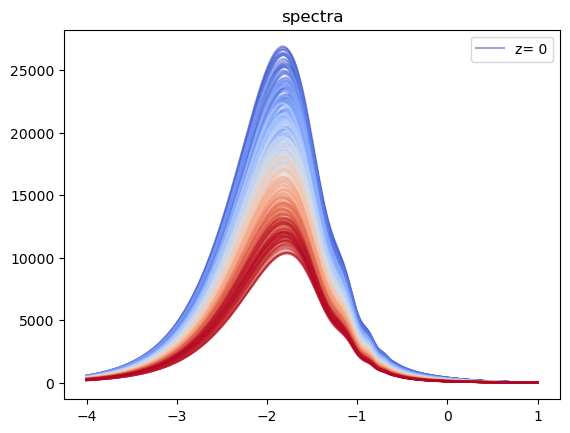

In [17]:
spectra = emulation_data.df_ext.loc['mpk'].values
for i, (spec, color) in enumerate(zip(spectra, colors)):
    if i == 0:
        plt.plot(kgrid, spec, c=color, alpha=0.5, label='z= %i' %emulation_data.z_requested[i])
    plt.plot(kgrid, spec, c=color, alpha=0.5)
plt.title('spectra')
plt.legend()

TRAINING DATA: (1029, 600)


Text(0.5, 1.0, 'spectra normed')

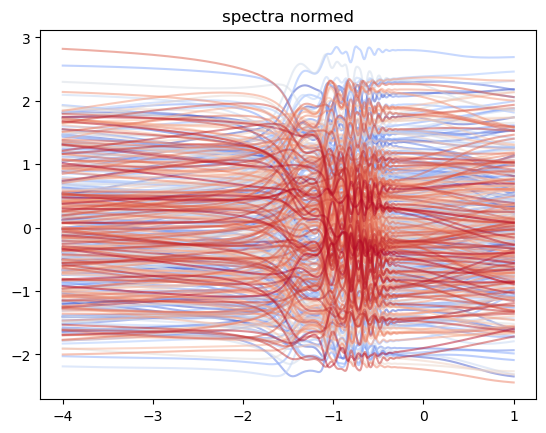

In [18]:
trainspace_matrix = intobj.trainspace_mat
print('TRAINING DATA:', trainspace_matrix.shape)
for spec, color in zip(trainspace_matrix, colors):
    plt.plot(kgrid, spec, c=color, alpha=0.5)
plt.title('spectra normed')

PCA RAW: (1029, 10)


Text(0.5, 1.0, 'pca')

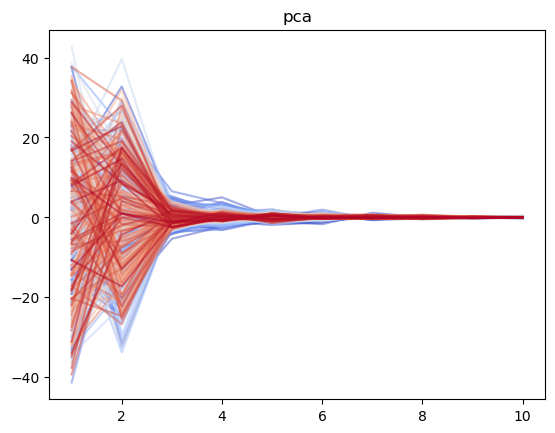

In [19]:
pca_raw = intobj.pca.fit(trainspace_matrix).transform(trainspace_matrix)
print('PCA RAW:', pca_raw.shape)
for pcar, color in zip(pca_raw, colors):
    plt.plot(np.linspace(1, npca, npca), pcar, c=color, alpha=0.5)
plt.title('pca')

PCA: (1029, 10)


Text(0.5, 1.0, 'pca normed')

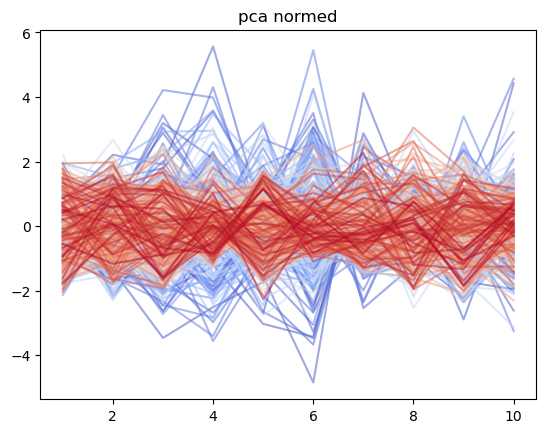

In [20]:
pca_test = intobj.representation
print('PCA:', pca_test.shape)
for pca, color in zip(pca_test, colors):
    plt.plot(np.linspace(1, npca, npca), pca, c=color, alpha=0.5)
plt.title('pca normed')

Text(0, 0.5, 'Normed Input Values')

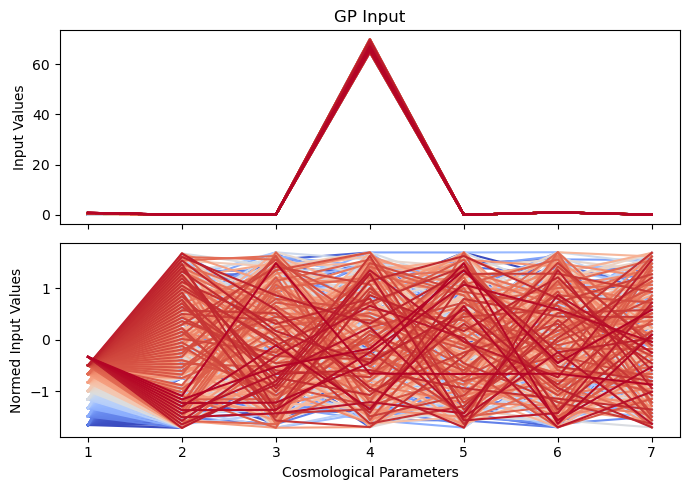

In [21]:
trainspace_raw = intobj.trainspace
trainspace_normed = (trainspace_raw - trainspace_raw.mean(axis=0)) / trainspace_raw.std(axis=0)

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)

for tsr, color in zip(trainspace_raw, colors):
    ax[0].plot(np.linspace(1, 7, 7), tsr, c=color)
ax[0].set_ylabel('Input Values')
ax[0].set_xticklabels([])
ax[0].set_title('GP Input')


for tsr, color in zip(trainspace_normed, colors):
    ax[1].plot(np.linspace(1, 7, 7), tsr, c=color)
ax[1].set_xlabel('Cosmological Parameters')
ax[1].set_ylabel('Normed Input Values')

In [22]:
plot_index = 20

Text(0, 0.5, 'Residuals')

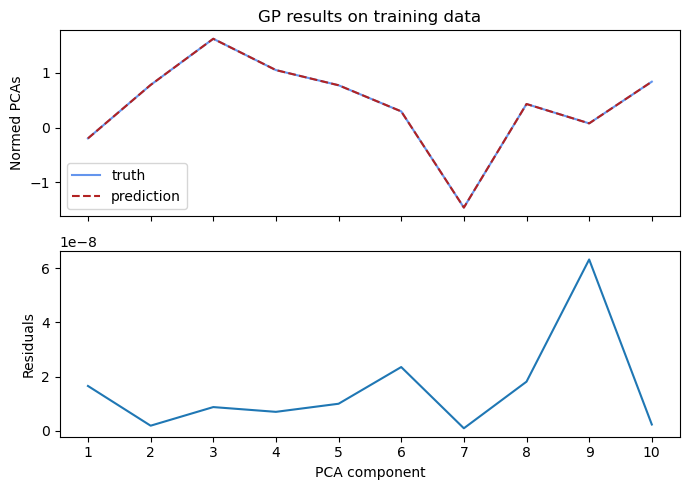

In [23]:
xtrain = (emulation_data.train_samples - emulation_data.train_samples.mean(axis=0)) / emulation_data.train_samples.std(axis=0)
prediction_pca_normed = intobj.gp_regressor.predict(xtrain)
truth_pca_normed = intobj.representation
fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(np.linspace(1, npca, npca), truth_pca_normed[plot_index], c='cornflowerblue', label='truth')
ax[0].plot(np.linspace(1, npca, npca), prediction_pca_normed[plot_index], c='firebrick', linestyle='--', label='prediction')
ax[0].legend()
ax[0].set_ylabel('Normed PCAs')
ax[0].set_xticks(np.arange(1, npca+1))
ax[0].set_xticklabels([])
ax[0].set_title('GP results on training data')

residuals = np.abs(1- (prediction_pca_normed/truth_pca_normed))
ax[1].plot(np.linspace(1, npca, npca), residuals[plot_index])
ax[1].set_xticks(np.arange(1, npca+1))
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

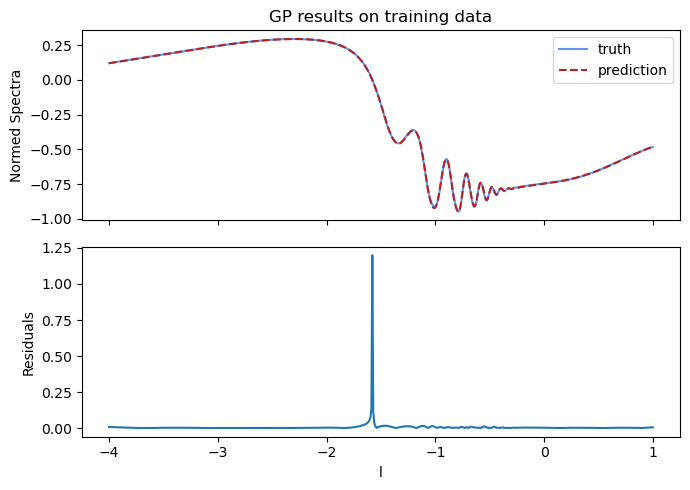

In [24]:
truth_spectrum_normed_train = intobj.trainspace_mat[plot_index]
prediction_spectrum_normed_train = intobj.reconstruct_data(emulation_data.train_samples, pca_norm=True)[plot_index]

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(kgrid, truth_spectrum_normed_train, c='cornflowerblue', label='truth')
ax[0].plot(kgrid, prediction_spectrum_normed_train, c='firebrick', linestyle='--', label='prediction')
ax[0].legend()
ax[0].set_ylabel('Normed Spectra')
ax[0].set_xticklabels([])
ax[0].set_title('GP results on training data')

residuals = np.abs(1- (prediction_spectrum_normed_train/truth_spectrum_normed_train))
ax[1].plot(kgrid, residuals)
ax[1].set_xlabel('l')
ax[1].set_ylabel('Residuals')

In [25]:
binwise_mean = emulation_data.binwise_mean
binwise_std = emulation_data.binwise_std
# ref = emulation_data.df_ref.loc['mpk', ].values
ref = 1

Text(0, 0.5, 'Residuals')

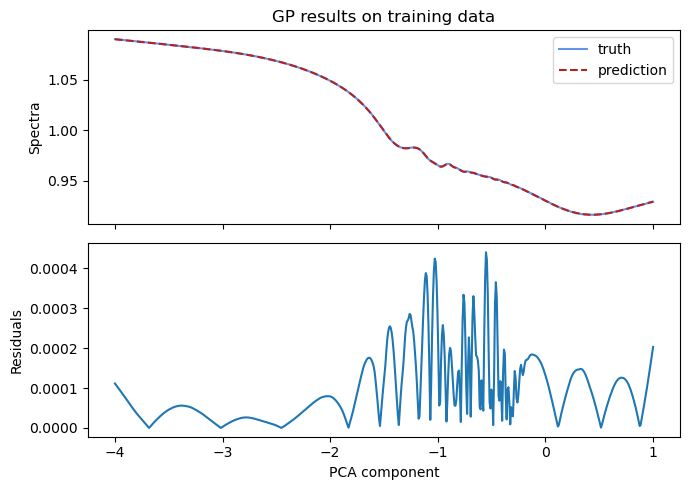

In [26]:
truth_spectrum_train = (truth_spectrum_normed_train * binwise_std + binwise_mean) * ref
prediction_spectrum_train = (prediction_spectrum_normed_train * binwise_std + binwise_mean) * ref


fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(kgrid, truth_spectrum_train.flatten(), c='cornflowerblue', label='truth')
ax[0].plot(kgrid, prediction_spectrum_train.flatten(), c='firebrick', linestyle='--', label='prediction')
ax[0].legend()
ax[0].set_ylabel('Spectra')
ax[0].set_xticklabels([])
ax[0].set_title('GP results on training data')

residuals = np.abs(1 - prediction_spectrum_train.flatten() / truth_spectrum_train.flatten())
ax[1].plot(kgrid, residuals)
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')

In [27]:
indexvalues = emulation_data.test_samples[plot_index]
truth_spectrum = emulation_data.df_ext.loc['mpk', indexvalues[0], 'omega_b', indexvalues[1], 'omega_cdm', indexvalues[2], 'H0', indexvalues[3], 'A_s', indexvalues[4], 'n_s', indexvalues[5], 'tau_reio', indexvalues[6]].values.flatten()

ref_spectrum = emulation_data.df_ref.loc['mpk', indexvalues[0]].values.flatten()
# ref_spectrum = 1
truth_spectrum_normed = (truth_spectrum/ref_spectrum - emulation_data.binwise_mean) / emulation_data.binwise_std
prediction_spectrum_normed = intobj.predict(emulation_data.test_samples, pca_norm=True)[tuple(indexvalues)]

In [28]:
indexvalues = emulation_data.test_samples[plot_index]
truth_spectrum_test = emulation_data.df_ext.loc['mpk', indexvalues[0], 
                                                'omega_b', indexvalues[1], 
                                                'omega_cdm', indexvalues[2], 
                                                'H0', indexvalues[3], 
                                                'A_s', indexvalues[4], 
                                                'n_s', indexvalues[5], 
                                                'tau_reio', indexvalues[6]].values.flatten()
ref_spectrum = emulation_data.df_ref.loc['mpk', indexvalues[0]].values.flatten()
truth_spectrum_normed_test = ((truth_spectrum_test/ref_spectrum) - emulation_data.binwise_mean) / emulation_data.binwise_std

truth_pca_test1 = intobj.pca.transform([truth_spectrum_normed_test]).flatten()
truth_pca_test = (truth_pca_test1 - intobj.matPCA_mean) / intobj.matPCA_std
xtest = (emulation_data.test_samples - intobj.trainspace_mean) / intobj.trainspace_std
prediction_pca_test, std_pca_test = intobj.gp_regressor.predict(xtest, return_std=True)

In [29]:
truth_normed_pcas_list = []

for ii in range(emulation_data.test_samples.shape[0]):
    indexvalues = emulation_data.test_samples[ii]
    truth_spectrum_test = emulation_data.df_ext.loc['mpk', indexvalues[0], 
                                                    'omega_b', indexvalues[1], 
                                                    'omega_cdm', indexvalues[2], 
                                                    'H0', indexvalues[3], 
                                                    'A_s', indexvalues[4], 
                                                    'n_s', indexvalues[5], 
                                                    'tau_reio', indexvalues[6]].values.flatten()
    ref_spectrum = emulation_data.df_ref.loc['mpk', indexvalues[0]].values.flatten()
    truth_spectrum_normed_test = ((truth_spectrum_test/ref_spectrum) - emulation_data.binwise_mean) / emulation_data.binwise_std
    truth_pca_test_raw = intobj.pca.transform([truth_spectrum_normed_test]).flatten()
    truth_pca_test = (truth_pca_test_raw - intobj.matPCA_mean) / intobj.matPCA_std
    truth_normed_pcas_list.append(truth_pca_test)

truth_normed_pcas = np.array(truth_normed_pcas_list)

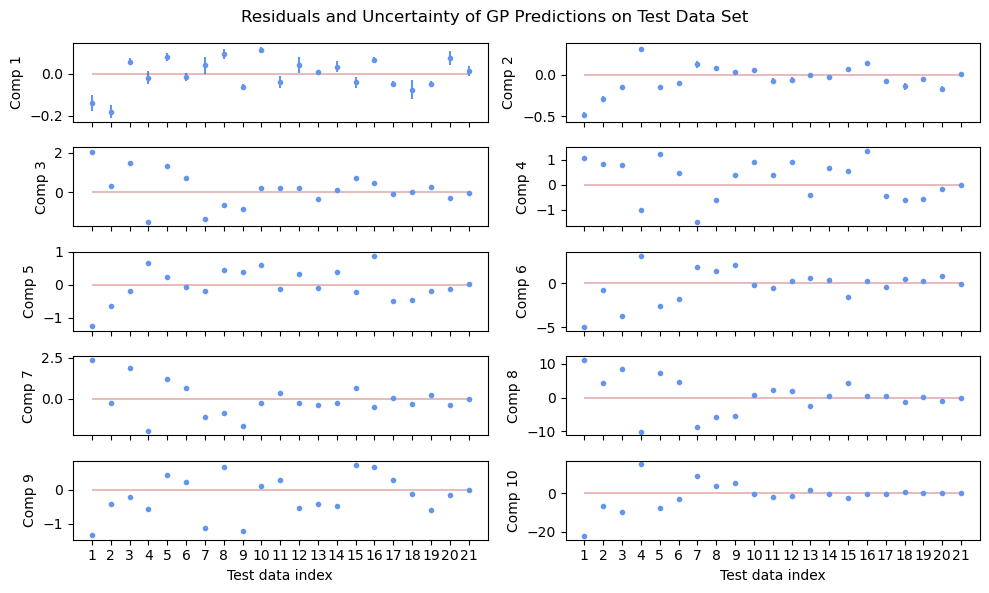

In [30]:
n_test = emulation_data.test_samples.shape[0]
grid = np.linspace(1, n_test, n_test)
fig, axs = plt.subplots(nrows=int(np.ceil(npca/2)), ncols=2, figsize=(10,6))
#plt.subplots_adjust(hspace=0.5)
fig.suptitle('Residuals and Uncertainty of GP Predictions on Test Data Set')

for comp, ax in enumerate(axs.ravel()):
    ax.errorbar(grid, 
                 truth_normed_pcas[:,comp]-prediction_pca_test[:,comp], 
                 yerr=std_pca_test[:,comp], 
                 linestyle='', marker='.', color='cornflowerblue')
    ax.hlines(0, 1, n_test, color='firebrick', alpha=0.3)

    ax.set_ylabel("Comp %i" %(comp+1))
    ax.set_xticks(list(range(1,n_test+1)))
    ax.set_xticklabels([])

for i in range(2):
    axs[-1, i].set_xlabel('Test data index')
    axs[-1, i].set_xticklabels(list(range(1, n_test+1)))

plt.tight_layout()
plt.show()

In [74]:
plot_index =0

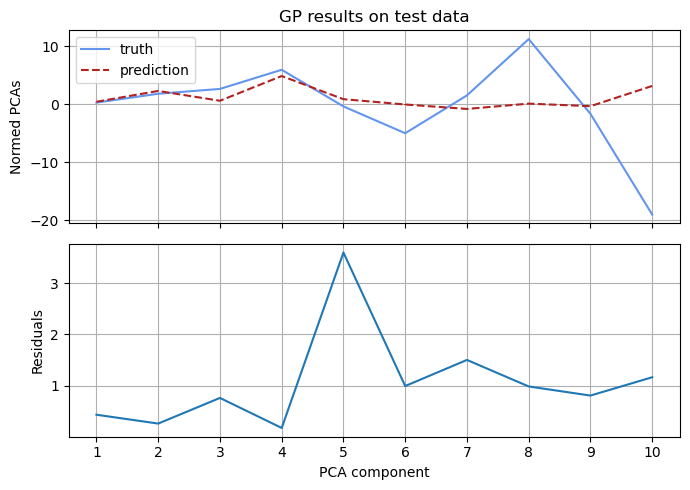

In [75]:
indexvalues = emulation_data.test_samples[plot_index]
truth_spectrum_test = emulation_data.df_ext.loc['mpk', indexvalues[0], 
                                                'omega_b', indexvalues[1], 
                                                'omega_cdm', indexvalues[2], 
                                                'H0', indexvalues[3], 
                                                'A_s', indexvalues[4], 
                                                'n_s', indexvalues[5], 
                                                'tau_reio', indexvalues[6]].values.flatten()
ref_spectrum = emulation_data.df_ref.loc['mpk', indexvalues[0]].values.flatten()

truth_spectrum_normed_test = ((truth_spectrum_test/ref_spectrum) - emulation_data.binwise_mean) / emulation_data.binwise_std

truth_pca_test1 = intobj.pca.transform([truth_spectrum_normed_test]).flatten()
truth_pca_test = (truth_pca_test1 - intobj.matPCA_mean) / intobj.matPCA_std
xtest = (emulation_data.test_samples - intobj.trainspace_mean) / intobj.trainspace_std
prediction_pca_test, std_pca_test = intobj.gp_regressor.predict(xtest, return_std=True)
# prediction_pca_test = intobj.interpolated_atoms(xtest)[plot_index]

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(np.linspace(1, npca, npca), truth_pca_test, c='cornflowerblue', label='truth')
ax[0].plot(np.linspace(1, npca, npca), prediction_pca_test[plot_index], c='firebrick', linestyle='--', label='prediction')
ax[0].errorbar(np.linspace(1, npca, npca), prediction_pca_test[plot_index], yerr=std_pca_test[plot_index], linestyle='', color='firebrick')
ax[0].legend()
ax[0].set_ylabel('Normed PCAs')
ax[0].set_xticks(np.arange(1, npca+1))
ax[0].set_xticklabels([])
ax[0].set_title('GP results on test data')
ax[0].grid()

residuals_pca = np.abs(1- (prediction_pca_test[plot_index]/truth_pca_test))
ax[1].plot(np.linspace(1, npca, npca), residuals_pca)
ax[1].set_xticks(np.arange(1, npca+1))
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')
ax[1].grid()

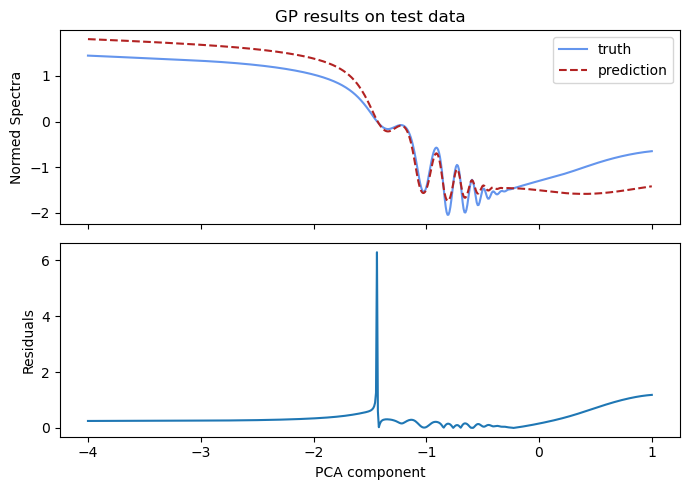

In [76]:
prediction_spectrum_normed_test = intobj.predict(emulation_data.test_samples, pca_norm=True)[tuple(indexvalues)]
# prediction_spectrum_normed = ratios_predicted[tuple(emulation_data.test_samples[plot_index])]

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(kgrid, truth_spectrum_normed_test, c='cornflowerblue', label='truth')
ax[0].plot(kgrid, prediction_spectrum_normed_test, c='firebrick', linestyle='--', label='prediction')
ax[0].legend()
ax[0].set_ylabel('Normed Spectra')
ax[0].set_xticklabels([])
ax[0].set_title('GP results on test data')
# ax[0].hlines(0, 1, 2499, color='black', alpha=0.3)

residuals_norm = np.abs(1 - prediction_spectrum_normed_test / truth_spectrum_normed_test)
ax[1].plot(kgrid, residuals_norm)
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')
plt.show()

Text(0, 0.5, 'Residuals')

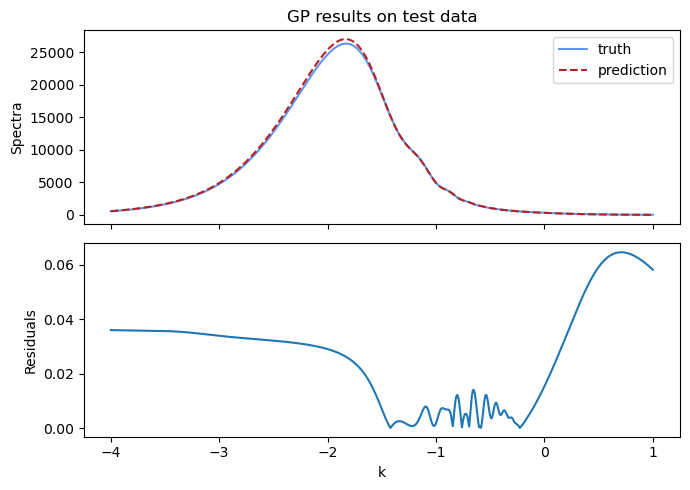

In [77]:
prediction_spectrum_test = (prediction_spectrum_normed_test * binwise_std + binwise_mean) * ref_spectrum
# prediction_spectrum_test = dcl.reconstruct_spectra(prediction_spectrum_normed_test, emulation_data)

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(kgrid, truth_spectrum_test, c='cornflowerblue', label='truth')
ax[0].plot(kgrid, prediction_spectrum_test.flatten(), c='firebrick', linestyle='--', label='prediction')
ax[0].legend()
ax[0].set_ylabel('Spectra')
ax[0].set_xticklabels([])
ax[0].set_title('GP results on test data')

residuals = np.abs(1 - prediction_spectrum_test.flatten() / truth_spectrum_test)
ax[1].plot(kgrid, residuals)
ax[1].set_xlabel('k')
ax[1].set_ylabel('Residuals')

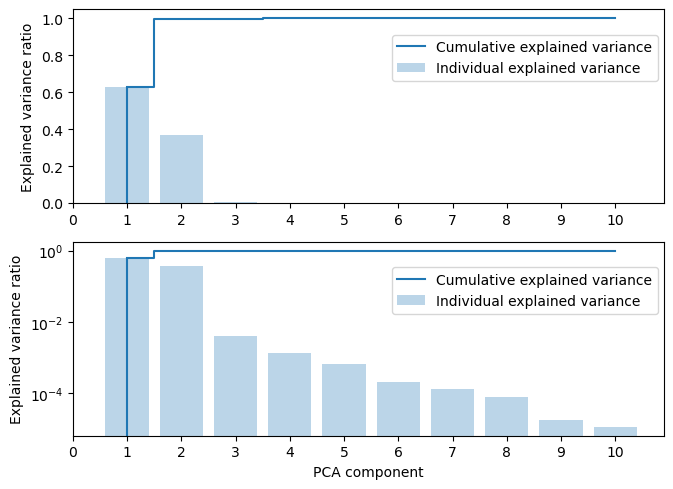

In [35]:
pca = intobj.pca

X_train_pca = pca.fit_transform(trainspace_matrix)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
fig, ax = plt.subplots(2, figsize=(7, 5))
ax[0].step(range(1, len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
ax[0].bar(range(1, len(exp_var_pca)+1), exp_var_pca, alpha=0.3, align='center', label='Individual explained variance')
ax[0].vlines(x=1, ymin=0, ymax=cum_sum_eigenvalues[0])
ax[0].set_ylabel('Explained variance ratio')
ax[0].set_xticks(list(range(npca+1)))
ax[0].legend(loc=(0.54, 0.63))

ax[1].step(range(1, len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
ax[1].bar(range(1, len(exp_var_pca)+1), exp_var_pca, alpha=0.3, align='center', label='Individual explained variance')
ax[1].vlines(x=1, ymin=0, ymax=cum_sum_eigenvalues[0])
ax[1].set_ylabel('Explained variance ratio')
ax[1].set_xlabel('PCA component')
ax[1].set_yscale('log')
ax[1].set_xticks(list(range(npca+1)))
ax[1].legend(loc=(0.54, 0.63))
plt.tight_layout()
plt.show()

In [68]:
import pickle
filename = 'gp_mpk_z0to2.sav'
pickle.dump(intobj, open(filename, 'wb'))